# Oregon Wildlife - Image Classification Capstone
## David Lappin
### BrainStation
#### 3/1/2023 -

## Model Optimization - Drop Out

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
#set local path to files for basic exploration

datapath = 'data/oregon_wildlife/' # This is the relative path to the data
image_files = os.listdir(datapath) #these are the individual folder names (the class names)

In [20]:
#define loading parameters 

batch_size = 32 
img_height = 180
img_width = 180

In [21]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  datapath,
  validation_split=0.2,
  subset="training",
  label_mode='int',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13950 files belonging to 20 classes.
Using 11160 files for training.


In [22]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  datapath,
  validation_split=0.2,
  subset="validation",
  label_mode='int',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13950 files belonging to 20 classes.
Using 2790 files for validation.


In [23]:
class_names = test_set.class_names
class_names

['bald_eagle',
 'black_bear',
 'bobcat',
 'canada_lynx',
 'columbian_black-tailed_deer',
 'cougar',
 'coyote',
 'deer',
 'elk',
 'gray_fox',
 'gray_wolf',
 'mountain_beaver',
 'nutria',
 'raccoon',
 'raven',
 'red_fox',
 'ringtail',
 'sea_lions',
 'seals',
 'virginia_opossum']

In [24]:
#adjust the prefetching for performance

AUTOTUNE = tf.data.AUTOTUNE #Autotune optimizes CPU uptime for each batch

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #cache stores data in memory after 1st epoch for faster iterations
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE) #prefetch allows for overlapping 


In [25]:
# creates an augmentation sequence that can be used on a single example to create new variations

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [26]:
#re-define model and output classification value (20)
num_classes = len(class_names)
img_height = 180
img_width = 180


#Define Model
model = Sequential([
  
  #rescale and data augmentation  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  data_augmentation,  
    
  #Conv layers and pooling  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
      
  #Flatten  
  layers.Flatten(),
     
  #Dense Layers  
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),  
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation = 'softmax')
])


In [27]:
#complile model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
#model summary information

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [29]:
# set stopping criteria

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.005, patience=5)

In [30]:
#run for 100 epochs

epochs = 100

history = model.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/100


C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


349/349 [==============================] - 136s 308ms/step - loss: 2.9521 - accuracy: 0.0834 - val_loss: 2.8680 - val_accuracy: 0.1269
Epoch 2/100
349/349 [==============================] - 105s 300ms/step - loss: 2.7879 - accuracy: 0.1421 - val_loss: 2.6586 - val_accuracy: 0.1832
Epoch 3/100
349/349 [==============================] - 98s 280ms/step - loss: 2.6436 - accuracy: 0.1818 - val_loss: 2.5136 - val_accuracy: 0.2190
Epoch 4/100
349/349 [==============================] - 98s 280ms/step - loss: 2.5429 - accuracy: 0.2143 - val_loss: 2.4288 - val_accuracy: 0.2523
Epoch 5/100
349/349 [==============================] - 99s 283ms/step - loss: 2.4659 - accuracy: 0.2370 - val_loss: 2.4482 - val_accuracy: 0.2434
Epoch 6/100
349/349 [==============================] - 102s 291ms/step - loss: 2.4048 - accuracy: 0.2573 - val_loss: 2.3552 - val_accuracy: 0.2699
Epoch 7/100
349/349 [==============================] - 101s 290ms/step - loss: 2.3157 - accuracy: 0.2815 - val_loss: 2.3273 - val_acc

KeyboardInterrupt: 

In [34]:
#save weights for easier loading later

model.save("Firstdropoutmodel.h5")


### Observations


## Batch Normalization

In [38]:
num_classes = len(class_names)
img_height = 180
img_width = 180

model1 = Sequential([
  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  data_augmentation,  
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),  
  layers.MaxPooling2D(),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
   
    
  #Flatten  
  layers.Flatten(),
    
  #Dense Layers  
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),  
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation = 'softmax')
])


In [39]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_3 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)       

In [ ]:
# set stopping criteria
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.005, patience=5)

In [41]:
#Train 10 initial epochs and evaluate results

epochs = 10

history = model1.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/10
349/349 [==============================] - 166s 468ms/step - loss: 3.1543 - accuracy: 0.0713 - val_loss: 3.0256 - val_accuracy: 0.0925
Epoch 2/10
349/349 [==============================] - 153s 439ms/step - loss: 2.8969 - accuracy: 0.1062 - val_loss: 2.7769 - val_accuracy: 0.1452
Epoch 3/10
349/349 [==============================] - 148s 425ms/step - loss: 2.8422 - accuracy: 0.1183 - val_loss: 2.7865 - val_accuracy: 0.1283
Epoch 4/10
349/349 [==============================] - 149s 428ms/step - loss: 2.7980 - accuracy: 0.1235 - val_loss: 2.7287 - val_accuracy: 0.1423
Epoch 5/10
349/349 [==============================] - 149s 427ms/step - loss: 2.7695 - accuracy: 0.1293 - val_loss: 2.6910 - val_accuracy: 0.1520
Epoch 6/10
349/349 [==============================] - 154s 441ms/step - loss: 2.7594 - accuracy: 0.1304 - val_loss: 2.6488 - val_accuracy: 0.1581
Epoch 7/10
349/349 [==============================] - 155s 443ms/step - loss: 2.7195 - accuracy: 0.1491 - val_loss: 2.7834 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

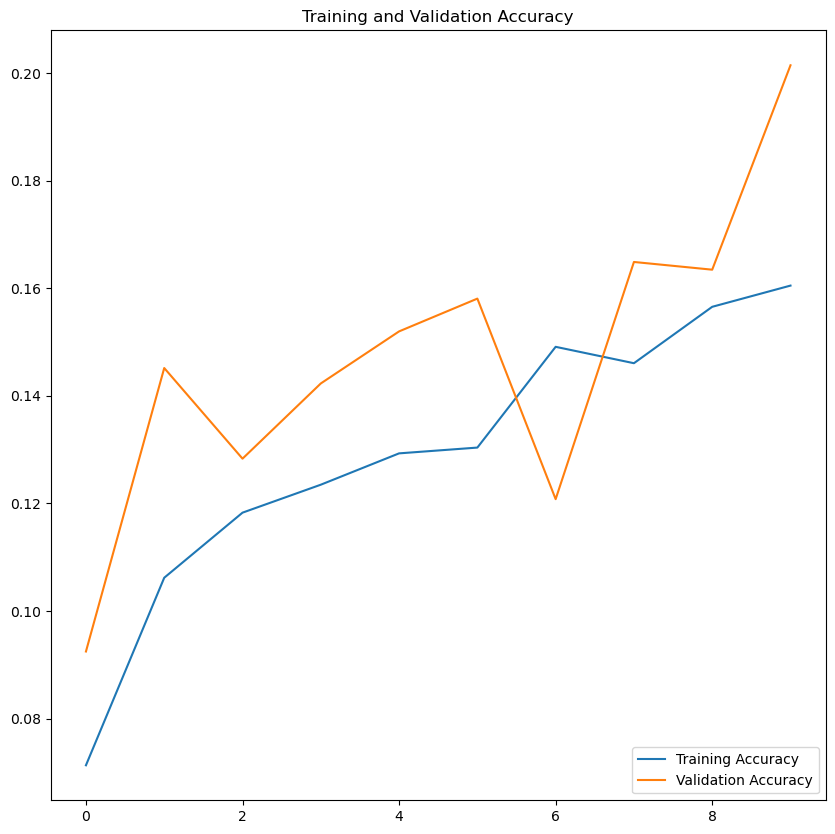

In [42]:
#visualize model performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [43]:
#train additional 20 epochs and visualize results (total 30)

epochs = 20

history = model1.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/20
349/349 [==============================] - 152s 435ms/step - loss: 2.6515 - accuracy: 0.1627 - val_loss: 2.6420 - val_accuracy: 0.1864
Epoch 2/20
349/349 [==============================] - 151s 433ms/step - loss: 2.6409 - accuracy: 0.1679 - val_loss: 2.6201 - val_accuracy: 0.1735
Epoch 3/20
349/349 [==============================] - 149s 428ms/step - loss: 2.6099 - accuracy: 0.1784 - val_loss: 2.6478 - val_accuracy: 0.1907
Epoch 4/20
349/349 [==============================] - 149s 426ms/step - loss: 2.5772 - accuracy: 0.1836 - val_loss: 2.6282 - val_accuracy: 0.1767
Epoch 5/20
349/349 [==============================] - 154s 440ms/step - loss: 2.5462 - accuracy: 0.2029 - val_loss: 2.5002 - val_accuracy: 0.2258
Epoch 6/20
349/349 [==============================] - 153s 439ms/step - loss: 2.5200 - accuracy: 0.2123 - val_loss: 2.4591 - val_accuracy: 0.2430
Epoch 7/20
349/349 [==============================] - 146s 419ms/step - loss: 2.4930 - accuracy: 0.2178 - val_loss: 2.6355 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

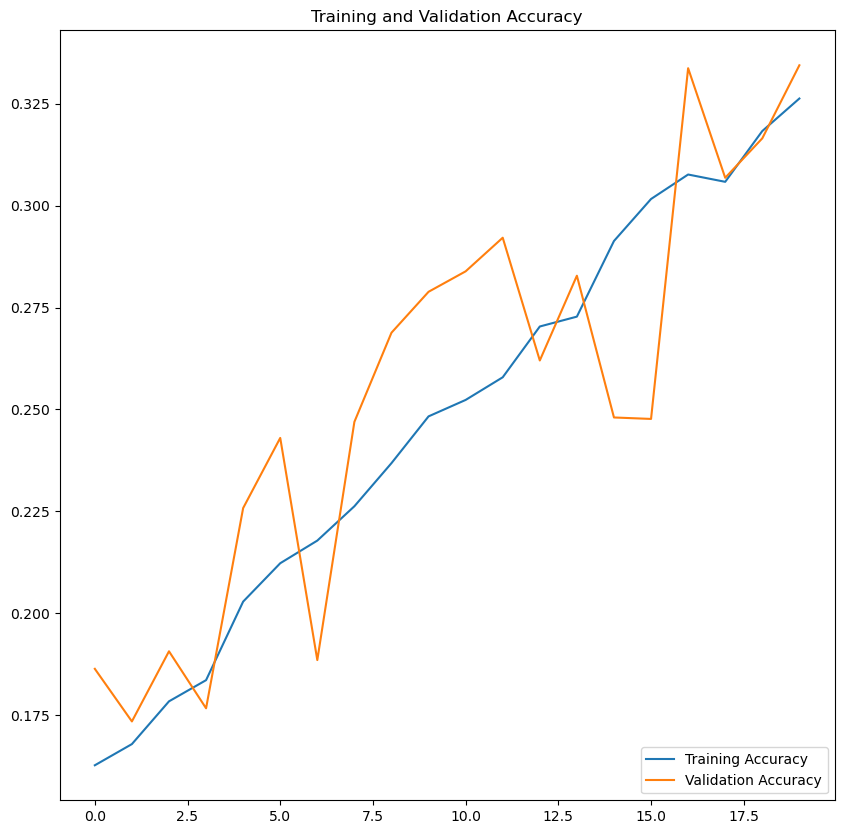

In [44]:
#visualize model performance after 30 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [45]:
#train additional epochs and visualize (50 total)

epochs = 20

history1 = model1.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/20
349/349 [==============================] - 150s 430ms/step - loss: 2.0804 - accuracy: 0.3412 - val_loss: 2.2915 - val_accuracy: 0.3158
Epoch 2/20
349/349 [==============================] - 150s 429ms/step - loss: 2.0436 - accuracy: 0.3465 - val_loss: 2.0517 - val_accuracy: 0.3659
Epoch 3/20
349/349 [==============================] - 152s 435ms/step - loss: 2.0218 - accuracy: 0.3544 - val_loss: 2.3035 - val_accuracy: 0.3219
Epoch 4/20
349/349 [==============================] - 151s 433ms/step - loss: 1.9895 - accuracy: 0.3645 - val_loss: 2.7168 - val_accuracy: 0.2728
Epoch 5/20
349/349 [==============================] - 151s 431ms/step - loss: 1.9830 - accuracy: 0.3668 - val_loss: 2.2681 - val_accuracy: 0.3222
Epoch 6/20
349/349 [==============================] - 150s 431ms/step - loss: 1.9522 - accuracy: 0.3788 - val_loss: 2.1458 - val_accuracy: 0.3638
Epoch 7/20
349/349 [==============================] - 150s 431ms/step - loss: 1.9378 - accuracy: 0.3796 - val_loss: 2.0412 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

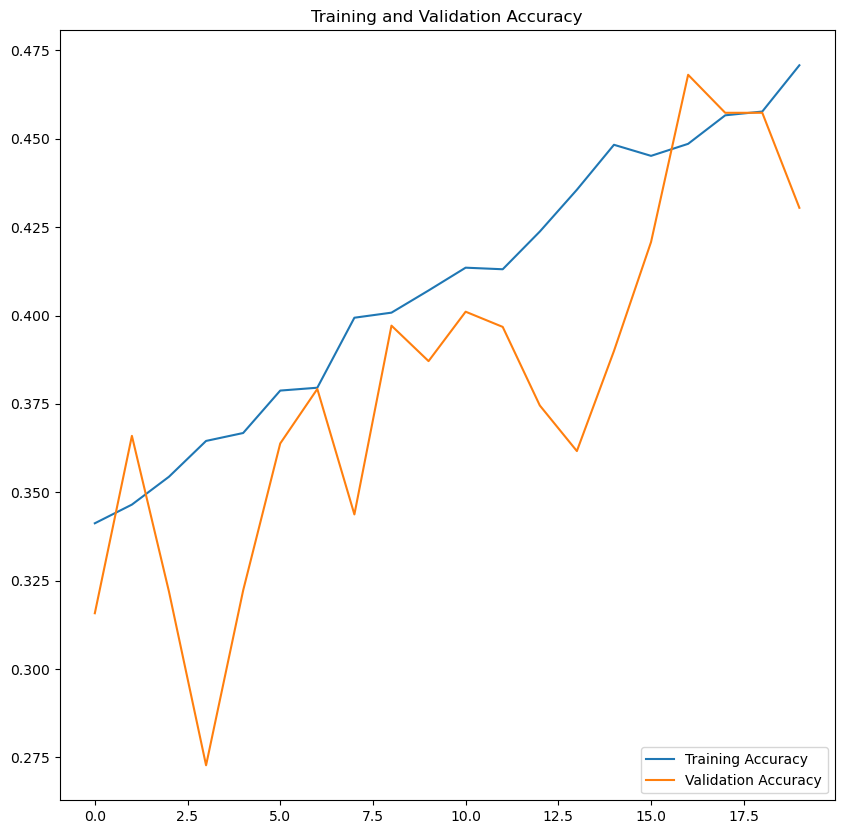

In [47]:
#visualize model performance at 50 epochs

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [50]:
model.save("BatchNorm_50epoch.h5")

In [51]:
#train additional (total 70)

epochs = 20

history1 = model1.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/20
349/349 [==============================] - 145s 416ms/step - loss: 1.6212 - accuracy: 0.4763 - val_loss: 1.7558 - val_accuracy: 0.4853
Epoch 2/20
349/349 [==============================] - 146s 419ms/step - loss: 1.5944 - accuracy: 0.4889 - val_loss: 2.4855 - val_accuracy: 0.3871
Epoch 3/20
349/349 [==============================] - 149s 426ms/step - loss: 1.5778 - accuracy: 0.4964 - val_loss: 2.0656 - val_accuracy: 0.4369
Epoch 4/20
349/349 [==============================] - 148s 425ms/step - loss: 1.5828 - accuracy: 0.4935 - val_loss: 1.7402 - val_accuracy: 0.4796
Epoch 5/20
349/349 [==============================] - 147s 422ms/step - loss: 1.5308 - accuracy: 0.5049 - val_loss: 2.0166 - val_accuracy: 0.4606
Epoch 6/20
349/349 [==============================] - 148s 424ms/step - loss: 1.5277 - accuracy: 0.5092 - val_loss: 1.7849 - val_accuracy: 0.4878
Epoch 7/20
349/349 [==============================] - 148s 423ms/step - loss: 1.4843 - accuracy: 0.5241 - val_loss: 1.8729 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

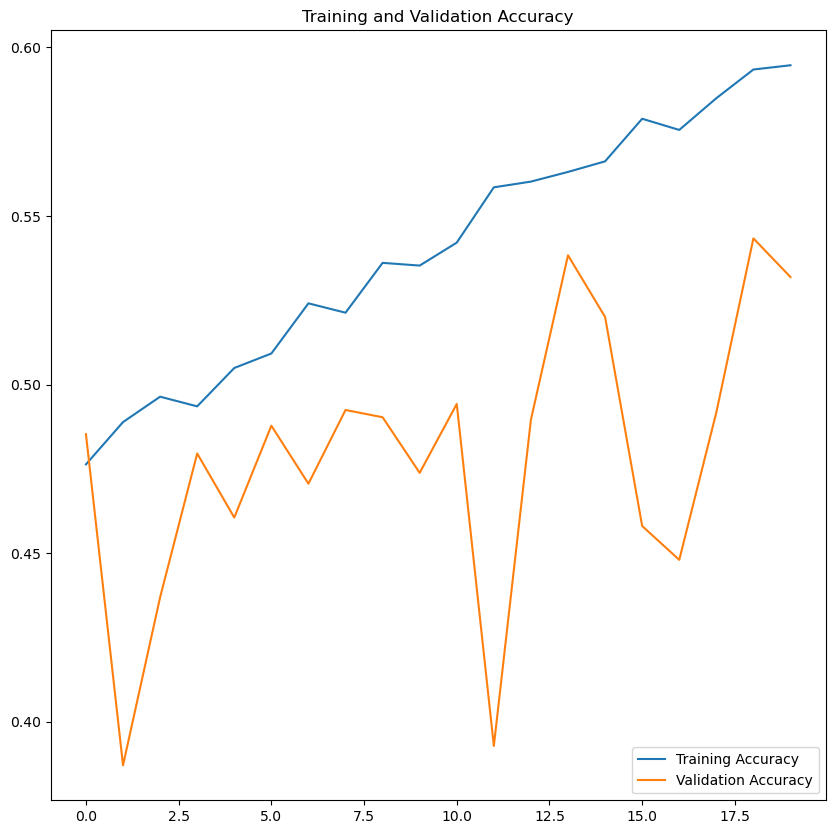

In [52]:
#visualize model performance at 70 epochs

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [53]:
model1.save('BatchNorm_70epoch.h5')

In [54]:
#train additional (total 90)

epochs = 20

history1 = model1.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/20
349/349 [==============================] - 149s 427ms/step - loss: 1.2413 - accuracy: 0.6035 - val_loss: 2.2217 - val_accuracy: 0.4710
Epoch 2/20
349/349 [==============================] - 149s 428ms/step - loss: 1.2347 - accuracy: 0.6067 - val_loss: 1.6075 - val_accuracy: 0.5502
Epoch 3/20
349/349 [==============================] - 148s 425ms/step - loss: 1.2409 - accuracy: 0.6056 - val_loss: 1.9310 - val_accuracy: 0.5097
Epoch 4/20
349/349 [==============================] - 148s 424ms/step - loss: 1.2277 - accuracy: 0.6152 - val_loss: 2.5202 - val_accuracy: 0.4774
Epoch 5/20
349/349 [==============================] - 151s 432ms/step - loss: 1.1928 - accuracy: 0.6259 - val_loss: 1.6629 - val_accuracy: 0.5789
Epoch 6/20
349/349 [==============================] - 151s 431ms/step - loss: 1.1682 - accuracy: 0.6278 - val_loss: 1.7196 - val_accuracy: 0.5351
Epoch 7/20
349/349 [==============================] - 150s 431ms/step - loss: 1.1485 - accuracy: 0.6386 - val_loss: 2.6857 -

In [55]:
model1.save('BatchNorm_90epoch.h5')

Text(0.5, 1.0, 'Training and Validation Accuracy')

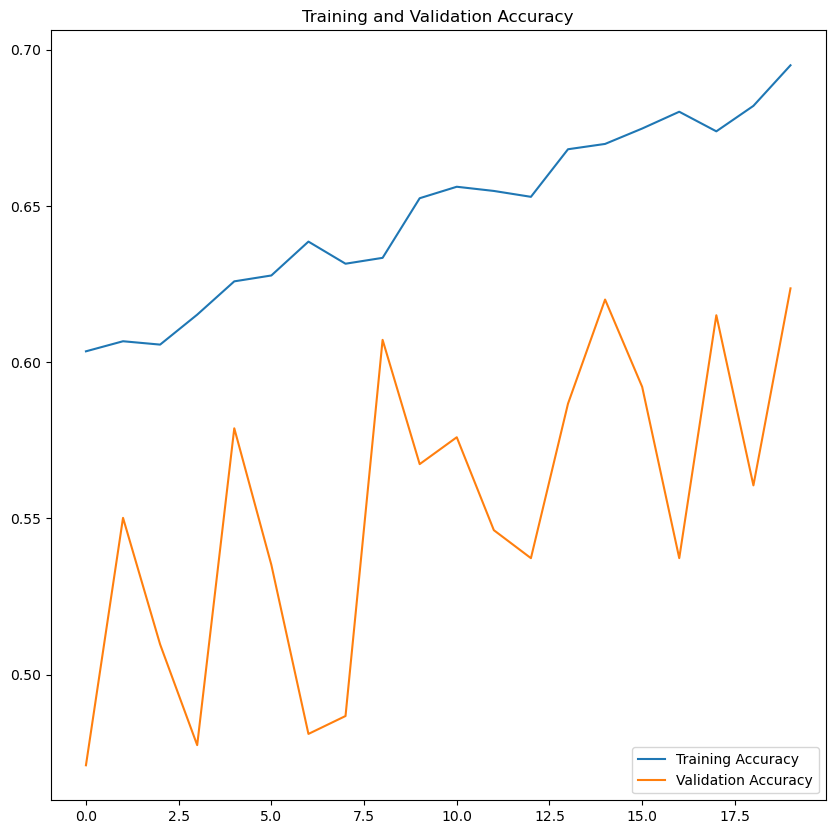

In [56]:
#visualize model performance at 90 epochs

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [57]:
#train additional (total 120)

epochs = 20

history1 = model1.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/20
349/349 [==============================] - 148s 424ms/step - loss: 1.0243 - accuracy: 0.6866 - val_loss: 2.5511 - val_accuracy: 0.5036
Epoch 2/20
349/349 [==============================] - 147s 421ms/step - loss: 0.9945 - accuracy: 0.6890 - val_loss: 1.6690 - val_accuracy: 0.5925
Epoch 3/20
349/349 [==============================] - 146s 419ms/step - loss: 0.9688 - accuracy: 0.6993 - val_loss: 1.8631 - val_accuracy: 0.5627
Epoch 4/20
349/349 [==============================] - 146s 419ms/step - loss: 0.9590 - accuracy: 0.7064 - val_loss: 1.4210 - val_accuracy: 0.6326
Epoch 5/20
349/349 [==============================] - 147s 421ms/step - loss: 0.9732 - accuracy: 0.6996 - val_loss: 1.8618 - val_accuracy: 0.5946
Epoch 6/20
349/349 [==============================] - 147s 423ms/step - loss: 0.9611 - accuracy: 0.7046 - val_loss: 1.5085 - val_accuracy: 0.6165
Epoch 7/20
349/349 [==============================] - 148s 423ms/step - loss: 0.9459 - accuracy: 0.7105 - val_loss: 1.5979 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

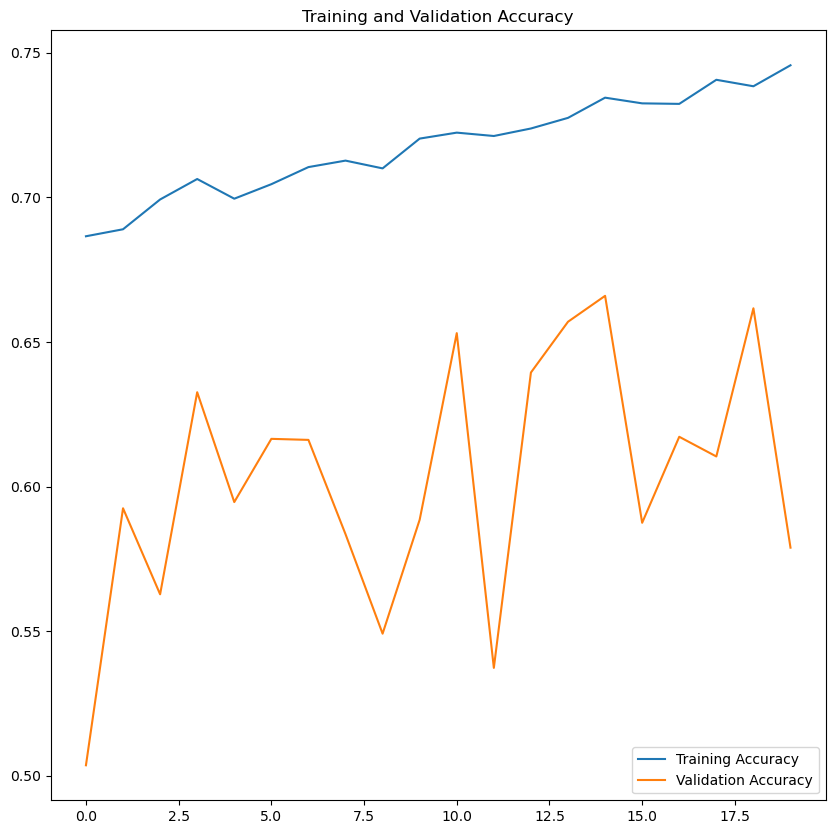

In [58]:
#visualize model performance at 120 epochs

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [59]:
#train additional (total 140)

epochs = 20

history1 = model1.fit(   
  train_set,            
  validation_data=test_set, 
  epochs=epochs,
  callbacks = [callbacks]  
)

Epoch 1/20
349/349 [==============================] - 149s 426ms/step - loss: 0.8262 - accuracy: 0.7473 - val_loss: 1.7269 - val_accuracy: 0.6097
Epoch 2/20
349/349 [==============================] - 149s 426ms/step - loss: 0.8173 - accuracy: 0.7473 - val_loss: 2.4525 - val_accuracy: 0.5086
Epoch 3/20
349/349 [==============================] - 148s 425ms/step - loss: 0.8031 - accuracy: 0.7521 - val_loss: 1.8596 - val_accuracy: 0.6047
Epoch 4/20
349/349 [==============================] - 148s 425ms/step - loss: 0.8174 - accuracy: 0.7507 - val_loss: 1.4812 - val_accuracy: 0.6505
Epoch 5/20
349/349 [==============================] - 148s 425ms/step - loss: 0.7940 - accuracy: 0.7608 - val_loss: 1.6048 - val_accuracy: 0.6337
Epoch 6/20
349/349 [==============================] - 149s 426ms/step - loss: 0.8037 - accuracy: 0.7561 - val_loss: 2.2578 - val_accuracy: 0.5441
Epoch 7/20
349/349 [==============================] - 148s 425ms/step - loss: 0.7860 - accuracy: 0.7596 - val_loss: 1.5078 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

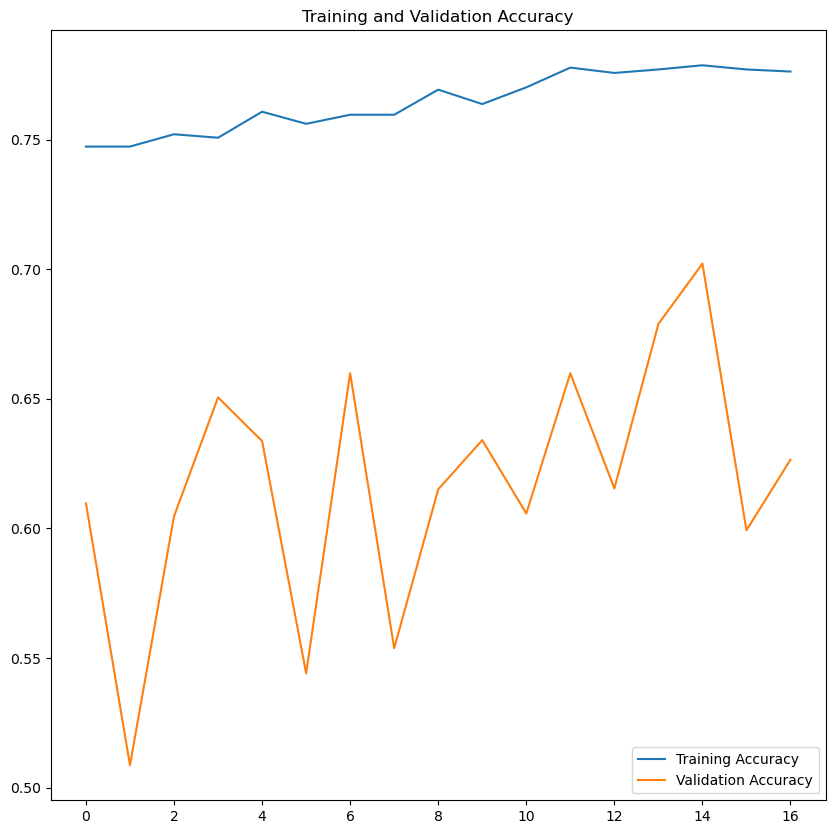

In [61]:
#visualize model performance at 140 epochs

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(17)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [62]:
model1.save('BatchNorm_137epoch.h5')